In [2]:
import pandas as pd
import numpy as np
import preprocess_text as pt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import json
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

,age,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,","Extreme obesity,","Fever,","chills,","or sweating,","Shortness of breath,","Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,","Nothing,"
0,32,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
1,31,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0
2,21,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,33,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0
4,27,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,34,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
147,38,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
148,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
149,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


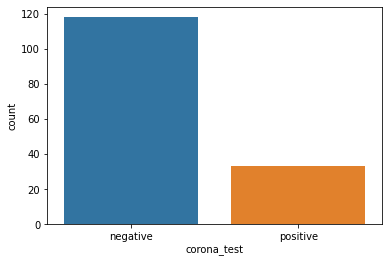

In [3]:
# df = pd.read_csv("patient_data_all_150.csv")
path = "patient_data_all_150.csv"
df, target = pt.preprocess(path)
df = df.drop(columns = ["gender", "smoker"])
df

# KNeighrest neighbour

In [4]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Train test split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=20, shuffle=True)

# Applying smote


smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

# so as you can say from the results that before smoting we had only 20 samples from class 1
# and we had 74 samples from class 0 so we performed smote to make them equal. 

# X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)


max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

# Building the model

from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
y_test = np.array(y_test).astype("int")
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print()
print("ROC curve value is: ", roc_value)


pd.crosstab(y_test, y_pred)

Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})
67
Testing accuracy is:  0.8043478260869565
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.45      0.62      0.53         8

    accuracy                           0.80        46
   macro avg       0.68      0.73      0.70        46
weighted avg       0.83      0.80      0.82        46


ROC curve value is:  0.7023026315789473


<ipython-input-4-9c6369a22ff6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["age"] = X_test["age"] / max_age


col_0,0,1
row_0,,
0,32,6
1,3,5


Confusion matrix, without normalization
[[32  6]
 [ 3  5]]


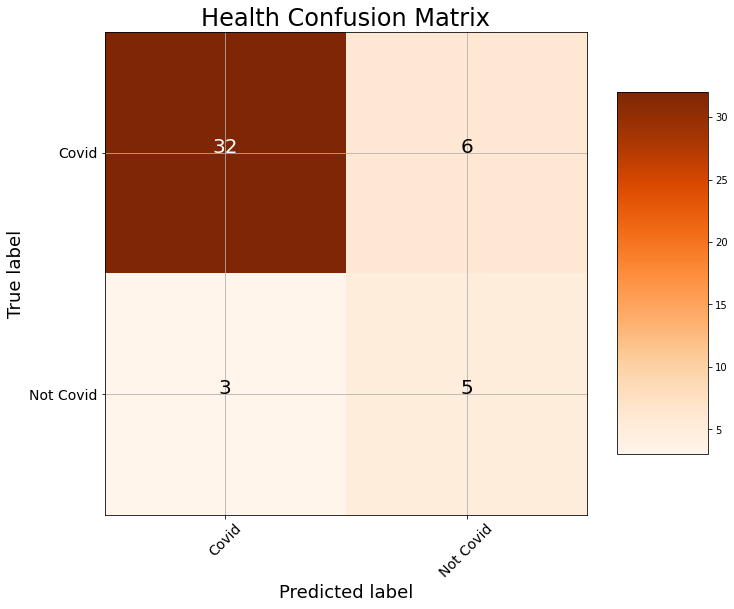

In [5]:
# Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        # Plot the confusion matrix
        plt.figure(figsize = (10, 10))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title, size = 24)
        plt.colorbar(aspect=4)
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45, size = 14)
        plt.yticks(tick_marks, classes, size = 14)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.

        # Labeling the plot
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)
        plt.show()
        
cm = confusion_matrix(y_test, y_pred)        
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'], title = 'Health Confusion Matrix')

# KNN part 2

Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})
67


<ipython-input-12-05641d1a93a2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["age"] = X_test["age"] / max_age


Text(0.5, 1.0, 'K neighbors classifier scores for different k values')

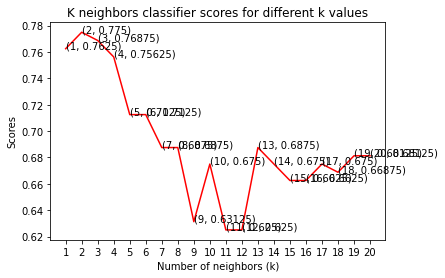

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Train test split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=20, shuffle=True)

# Applying smote


smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

# so as you can say from the results that before smoting we had only 20 samples from class 1
# and we had 74 samples from class 0 so we performed smote to make them equal. 

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

# Building the model

from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier, X_train_smote, y_train_smote, cv= 5)
    knn_scores.append(score.mean())


plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1, 21):
    plt.text(i, knn_scores[i - 1], (i, knn_scores[i - 1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Scores")
plt.title("K neighbors classifier scores for different k values")


# y_pred = model.predict(X_test)
# y_test = np.array(y_test).astype("int")
# print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# # Probabilities for each class
# rf_probs = model.predict_proba(X_test)[:, 1]

# # Calculate roc auc
# roc_value = roc_auc_score(y_test, rf_probs)
# print()
# print("ROC curve value is: ", roc_value)

# pd.crosstab(y_test, y_pred)

In [13]:
knn_scores = []

knn_classifier = KNeighborsClassifier(n_neighbors = 3)
score = cross_val_score(knn_classifier, X_train_smote, y_train_smote, cv= 5)
knn_scores.append(score.mean())
print(knn_scores)

knn_classifier.fit(X_train_smote, y_train_smote)

[0.76875]


KNeighborsClassifier(n_neighbors=3)

In [14]:
pred = knn_classifier.predict(X_test)
y_test = np.array(y_test).astype("int")
print("Testing accuracy is: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.8043478260869565
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.45      0.62      0.53         8

    accuracy                           0.80        46
   macro avg       0.68      0.73      0.70        46
weighted avg       0.83      0.80      0.82        46



col_0,0,1
row_0,,
0,32,6
1,3,5


# XGBoost Model

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Train test split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=20, shuffle=True)

# Applying smote

smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

# so as you can say from the results that before smoting we had only 20 samples from class 1
# and we had 74 samples from class 0 so we performed smote to make them equal. 

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

# Building the model
import xgboost as xgb

xgb_params = {
    'max_depth': 9,
    'eta': 0.00005,
    'silent': 0,
    'eval_metric': 'auc',
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'seed': 0
}

dtrain = xgb.DMatrix(X_train_smote, y_train_smote, feature_names= X_train_smote.columns.values)
dtest = xgb.DMatrix(X_test, y_test, feature_names = X_test.columns.values)

# res = xgb.cv(xgb_params, dtrain, num_boost_round=1000, nfold=4, seed=5, stratified=False,
#                      early_stopping_rounds=500, verbose_eval=10, show_stdv=True)

# best_nrounds = res.shape[0] - 1
# print(np.shape(X_train_smote), np.shape(X_test), np.shape(y_train_smote), np.shape(y_test))

evals = [(dtrain, "train"), (dtest, 'eval')]
xgb_model = xgb.train(params = xgb_params, dtrain= dtrain, num_boost_round = 2000, 
                      verbose_eval = 50, early_stopping_rounds = 500, evals = evals, maximize = True)


y_pred = xgb_model.predict(dtest)
y_test = np.array(y_test).astype("int")

best_preds = [0 if i < 0.5 else 1 for i in y_pred]
print(best_preds)
# best_preds = np.asarray([np.argmax(line) for line in y_pred])
# print(y_pred)
# print("Testing accuracy is: ", accuracy_score(y_test, best_preds))

from sklearn.metrics import precision_score

print(precision_score(y_test, best_preds, average='macro'))
# printing classification report
print(classification_report(y_test, best_preds))
# # Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print("ROC curve value is: ", roc_value)

# pd.crosstab(y_test, y_pred)

Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})
67


<ipython-input-21-15f06c04dbe0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["age"] = X_test["age"] / max_age


[17:59:59] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.81812	eval-auc:0.46382
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 500 rounds.
[50]	train-auc:0.93820	eval-auc:0.62500
[100]	train-auc:0.93766	eval-auc:0.63158
[150]	train-auc:0.94156	eval-auc:0.62500
[200]	train-auc:0.94312	eval-auc:0.62171
[250]	train-auc:0.94344	eval-auc:0.62171
[300]	train-auc:0.94437	eval-auc:0.62500
[350]	train-auc:0.94406	eval-auc:0.62829
[400]	train-auc:0.94391	eval-auc:0.62500
[450]	train-auc:0.94461	eval-auc:0.62171
[500]	train-auc:0.94477	eval-auc:0.62500
Stopping. Best iteration:
[23]	train-auc:0.93008	eval-auc:0.66118

[0, 0, 0,

In [22]:
# get dataframe version of important features for model

xgb_fea_imp = pd.DataFrame(list(xgb_model.get_fscore().items()),
                           columns = ['feature', 'importance']).sort_values('importance', ascending = False)

xgb_fea_imp.head(20)

,feature,importance
10,age,2331
11,"None,",577
5,"New or worsening cough,",408
0,"Nothing,",404
3,"Sore throat,",384
9,"Shortness of breath,",338
6,"Fever,",300
7,"Body aches,",278
8,"Diabetes with complications,",180
4,"Loss of taste,",156


# XGboost model 2

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Train test split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=25, shuffle=True)

# Applying smote

smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

# so as you can say from the results that before smoting we had only 20 samples from class 1
# and we had 74 samples from class 0 so we performed smote to make them equal. 

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

# Building the model
import xgboost as xgb

clf = xgb.XGBClassifier()


xgb_params = {
    'max_depth': [9, 3, 4, 5, 6, 8, 10, 12, 15],
    'eta': [0.0005, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'silent': [1],
    'eval_metric': ['auc'],
    'min_child_weight' : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.8 ],
    'n_estimators' : [5, 10, 25, 50, 80, 90, 120, 159, 161, 181]
}

grid = GridSearchCV(clf,
                    xgb_params, n_jobs=-1,
                    scoring="neg_log_loss",
                    cv=5)

grid.fit(X_train_smote, y_train_smote)


y_pred = grid.predict(X_test)
y_test = np.array(y_test).astype("int")

# best_preds = [0 if i < 0.5 else 1 for i in y_pred]
# print(best_preds)
# best_preds = np.asarray([np.argmax(line) for line in y_pred])
print(y_pred)

from sklearn.metrics import precision_score

print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print("Precision score is: ", precision_score(y_test, y_pred, average='macro'))

# printing classification report
print(classification_report(y_test, y_pred))
# # Probabilities for each class
# rf_probs = model.predict_proba(X_test)[:, 1]

# # Calculate roc auc
# roc_value = roc_auc_score(y_test, rf_probs)
# print("ROC curve value is: ", roc_value)

# pd.crosstab(y_test, y_pred)

Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})
67


<ipython-input-100-4569b86d2ada>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["age"] = X_test["age"] / max_age


In [ ]:
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print("Precision score is: ", precision_score(y_test, y_pred, average='macro'))

In [ ]:
print(classification_report(y_test, y_pred))

# XGboost model 3

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Train test split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=20, shuffle=True)

# Applying smote


smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

# so as you can say from the results that before smoting we had only 20 samples from class 1
# and we had 74 samples from class 0 so we performed smote to make them equal. 

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

# Building the model
import xgboost as xgb


xgb_params = {
    'max_depth': [9, 3, 4, 5, 6, 8, 10, 12, 15],
    'eta': [0.0005, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'eval_metric': ['auc'],
    'min_child_weight' : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.8 ],
    'n_estimators' : [5, 10, 25, 50, 80, 90, 120, 159, 161, 181],
    'learning_rate': [1e-6, 0.01, 0.2,  1.0,  3.0]
}

param_fixed = {
    'objective' : 'binary:logistic',
    'silent' : 1
}

clf = xgb.XGBClassifier(**param_fixed)

grid = GridSearchCV(estimator= clf,
                    param_grid = xgb_params, n_jobs=-1,
                    scoring="accuracy",
                    cv=5)

grid.fit(X_train_smote, y_train_smote)


y_pred = grid.predict(X_test)
y_test = np.array(y_test).astype("int")

# best_preds = [0 if i < 0.5 else 1 for i in y_pred]
# print(best_preds)
# best_preds = np.asarray([np.argmax(line) for line in y_pred])
print(y_pred)

from sklearn.metrics import precision_score

# print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
# print("Precision score is: ", precision_score(y_test, y_pred, average='macro'))

# printing classification report
# print(classification_report(y_test, y_pred))
# # Probabilities for each class
# rf_probs = model.predict_proba(X_test)[:, 1]

# # Calculate roc auc
# roc_value = roc_auc_score(y_test, rf_probs)
# print("ROC curve value is: ", roc_value)

# pd.crosstab(y_test, y_pred)

Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})
67


<ipython-input-14-5a849623dbd2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["age"] = X_test["age"] / max_age


In [5]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Train test split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=20, shuffle=True)

# Applying smote
smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

# Building the model
import xgboost as xgb

clf = xgb.XGBClassifier()


xgb_params = {
    'max_depth': 9,
    'eta': 0.05,
    'silent': 1,
    'eval_metric': 'auc',
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'objective': 'binary:logistic'
#     'objective': 'multi:softprob',  
#     'num_class': 2
}



weights = np.zeros(len(y_train_smote))
weights[y_train_smote == 0] = 1
weights[y_train_smote == 1] = 5

dtrain = xgb.DMatrix(X_train_smote, y_train_smote, feature_names= X_train_smote.columns.values, weight = weights)
dtest = xgb.DMatrix(X_test, y_test, feature_names = X_test.columns.values)

evals = [(dtrain, "train"), (dtest, 'eval')]
xgb_model = xgb.train(params = xgb_params, dtrain= dtrain, num_boost_round = 2000,
                      verbose_eval = 50, early_stopping_rounds = 500, evals = evals, maximize = True)


y_pred = (xgb_model.predict(dtest) > 0.5).astype('int')
y_test = np.array(y_test).astype("int")

# best_preds = [0 if i < 0.5 else 1 for i in y_pred]
# print(best_preds)
# best_preds = np.asarray([np.argmax(line) for line in y_pred])
# print(y_pred)
# print(y_test)

# from sklearn.metrics import precision_score

# print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
# print("Precision score is: ", precision_score(y_test, y_pred, average='macro'))

# printing classification report
# print(classification_report(y_test, best_preds))
# Probabilities for each class
# rf_probs = xgb_model.predict_proba(X_test)[:, 1]

# # Calculate roc auc
# roc_value = roc_auc_score(y_test, rf_probs)
# print("ROC curve value is: ", roc_value)
pd.crosstab(y_test, y_pred)

Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})
67
[01:11:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.80508	eval-auc:0.50822
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 500 rounds.


<ipython-input-5-a6342d1298ca>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["age"] = X_test["age"] / max_age


[50]	train-auc:0.97867	eval-auc:0.66118
[100]	train-auc:0.99383	eval-auc:0.67434
[150]	train-auc:0.99711	eval-auc:0.68421
[200]	train-auc:0.99852	eval-auc:0.68750
[250]	train-auc:0.99883	eval-auc:0.69408
[300]	train-auc:0.99867	eval-auc:0.68750
[350]	train-auc:0.99883	eval-auc:0.69408
[400]	train-auc:0.99883	eval-auc:0.69737
[450]	train-auc:0.99898	eval-auc:0.69408
[500]	train-auc:0.99883	eval-auc:0.69408
[550]	train-auc:0.99898	eval-auc:0.69079
[600]	train-auc:0.99883	eval-auc:0.70066
[650]	train-auc:0.99898	eval-auc:0.70066
[700]	train-auc:0.99883	eval-auc:0.69737
[750]	train-auc:0.99883	eval-auc:0.70066
[800]	train-auc:0.99898	eval-auc:0.70724
[850]	train-auc:0.99898	eval-auc:0.70724
[900]	train-auc:0.99898	eval-auc:0.70395
[950]	train-auc:0.99898	eval-auc:0.69079
[1000]	train-auc:0.99898	eval-auc:0.69408
[1050]	train-auc:0.99898	eval-auc:0.69408
[1100]	train-auc:0.99898	eval-auc:0.69079
[1150]	train-auc:0.99898	eval-auc:0.69408
[1200]	train-auc:0.99898	eval-auc:0.69079
[1250]	train

col_0,0,1
row_0,,
0,25,13
1,3,5


# XGboost

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Train test split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=20, shuffle=True)

# Applying smote


smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

# so as you can say from the results that before smoting we had only 20 samples from class 1
# and we had 74 samples from class 0 so we performed smote to make them equal. 

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

# Building the model
import xgboost as xgb


xgb_params = {
    'max_depth': [9, 3, 4, 5, 6, 8, 10, 12, 15],
    'eta': [0.00005, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'eval_metric': ['auc'],
    'min_child_weight' : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.8 ],
    'n_estimators' : [5, 10, 25, 50, 80, 90, 120, 159, 161, 181],
    'learning_rate': [1e-6, 0.01, 0.2,  1.0,  3.0]
}

param_fixed = {
    'objective' : 'binary:logistic',
    'silent' : 1
}

clf = xgb.XGBClassifier(**param_fixed)

grid = GridSearchCV(estimator= clf,
                    param_grid = xgb_params, n_jobs=-1,
                    scoring="accuracy",
                    cv=5)

grid.fit(X_train_smote, y_train_smote)


y_pred = grid.predict(X_test)
y_test = np.array(y_test).astype("int")

# best_preds = [0 if i < 0.5 else 1 for i in y_pred]
# print(best_preds)
# best_preds = np.asarray([np.argmax(line) for line in y_pred])
print(y_pred)

from sklearn.metrics import precision_score

# print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
# print("Precision score is: ", precision_score(y_test, y_pred, average='macro'))

# printing classification report
# print(classification_report(y_test, y_pred))
# # Probabilities for each class
# rf_probs = model.predict_proba(X_test)[:, 1]

# # Calculate roc auc
# roc_value = roc_auc_score(y_test, rf_probs)
# print("ROC curve value is: ", roc_value)

# pd.crosstab(y_test, y_pred)

# SVM Hyperparameter tuning

In [44]:
# hyper parameters for SVC
kernel = ["linear","poly","rbf","sigmoid"]
degree = [2,3,4]
gammas = [0.001, 0.0001, 0.00001, 0.01, 0.1, 1, 10, 100]
# making C list  
C=[1, 10, 100, 200, 300, 1000]


In [45]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Train test split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=20, shuffle=True)

# Applying smote


smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

# so as you can say from the results that before smoting we had only 20 samples from class 1
# and we had 74 samples from class 0 so we performed smote to make them equal. 

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

# Building the model

# y_pred = model.predict(X_test)
# y_test = np.array(y_test).astype("int")
# print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# # Probabilities for each class
# rf_probs = model.predict_proba(X_test)[:, 1]

# # Calculate roc auc
# roc_value = roc_auc_score(y_test, rf_probs)
# print()
# print("ROC curve value is: ", roc_value)

# pd.crosstab(y_test, y_pred)



# trying to fit the model with different hyperparameters to achieve the highest accuracy
accuracy_history = []
for i in kernel:
    for j in degree:
        for k in gammas:
            for l in C:
                clf = SVC(kernel = i,C=l, degree = j, gamma=k,random_state=0)
                clf.fit(X_train_smote,y_train_smote)
                pred = clf.predict(X_test)
                accuracy = accuracy_score(pred,y_test)
                print("Accuracy on test dataset with",i,"kernel",j,"degree",k,"gamma",l,"C: ", accuracy)
                accuracy_history.append(accuracy)

Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})
67
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 1 C:  0.6086956521739131
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 10 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 100 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 200 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 300 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 1000 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.0001 gamma 1 C:  0.6086956521739131
Accuracy on test dataset with linear kernel 2 degree 0.0001 gamma 10 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.0001 gamma 100 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.0001 gamma 200 C:  0.5869565217391305
A

<ipython-input-45-651a84197f3d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["age"] = X_test["age"] / max_age


Accuracy on test dataset with linear kernel 2 degree 0.0001 gamma 1000 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 1e-05 gamma 1 C:  0.6086956521739131
Accuracy on test dataset with linear kernel 2 degree 1e-05 gamma 10 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 1e-05 gamma 100 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 1e-05 gamma 200 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 1e-05 gamma 300 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 1e-05 gamma 1000 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 1 C:  0.6086956521739131
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 10 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 100 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 200 C:  0.586956521739

Accuracy on test dataset with linear kernel 4 degree 1e-05 gamma 300 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 4 degree 1e-05 gamma 1000 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 4 degree 0.01 gamma 1 C:  0.6086956521739131
Accuracy on test dataset with linear kernel 4 degree 0.01 gamma 10 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 4 degree 0.01 gamma 100 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 4 degree 0.01 gamma 200 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 4 degree 0.01 gamma 300 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 4 degree 0.01 gamma 1000 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 4 degree 0.1 gamma 1 C:  0.6086956521739131
Accuracy on test dataset with linear kernel 4 degree 0.1 gamma 10 C:  0.5869565217391305
Accuracy on test dataset with linear kernel 4 degree 0.1 gamma 100 C:  0.5869565217391305
Accu

Accuracy on test dataset with poly kernel 3 degree 1 gamma 1000 C:  0.6739130434782609
Accuracy on test dataset with poly kernel 3 degree 10 gamma 1 C:  0.6739130434782609
Accuracy on test dataset with poly kernel 3 degree 10 gamma 10 C:  0.6521739130434783
Accuracy on test dataset with poly kernel 3 degree 10 gamma 100 C:  0.6739130434782609
Accuracy on test dataset with poly kernel 3 degree 10 gamma 200 C:  0.6739130434782609
Accuracy on test dataset with poly kernel 3 degree 10 gamma 300 C:  0.6739130434782609
Accuracy on test dataset with poly kernel 3 degree 10 gamma 1000 C:  0.717391304347826
Accuracy on test dataset with poly kernel 3 degree 100 gamma 1 C:  0.6304347826086957
Accuracy on test dataset with poly kernel 3 degree 100 gamma 10 C:  0.6304347826086957
Accuracy on test dataset with poly kernel 3 degree 100 gamma 100 C:  0.7391304347826086
Accuracy on test dataset with poly kernel 3 degree 100 gamma 200 C:  0.6304347826086957
Accuracy on test dataset with poly kernel 3 d

Accuracy on test dataset with rbf kernel 2 degree 10 gamma 1000 C:  0.7608695652173914
Accuracy on test dataset with rbf kernel 2 degree 100 gamma 1 C:  0.7608695652173914
Accuracy on test dataset with rbf kernel 2 degree 100 gamma 10 C:  0.7608695652173914
Accuracy on test dataset with rbf kernel 2 degree 100 gamma 100 C:  0.7608695652173914
Accuracy on test dataset with rbf kernel 2 degree 100 gamma 200 C:  0.782608695652174
Accuracy on test dataset with rbf kernel 2 degree 100 gamma 300 C:  0.782608695652174
Accuracy on test dataset with rbf kernel 2 degree 100 gamma 1000 C:  0.7608695652173914
Accuracy on test dataset with rbf kernel 3 degree 0.001 gamma 1 C:  0.6739130434782609
Accuracy on test dataset with rbf kernel 3 degree 0.001 gamma 10 C:  0.6739130434782609
Accuracy on test dataset with rbf kernel 3 degree 0.001 gamma 100 C:  0.5217391304347826
Accuracy on test dataset with rbf kernel 3 degree 0.001 gamma 200 C:  0.5652173913043478
Accuracy on test dataset with rbf kernel 3

Accuracy on test dataset with sigmoid kernel 2 degree 0.01 gamma 1 C:  0.6739130434782609
Accuracy on test dataset with sigmoid kernel 2 degree 0.01 gamma 10 C:  0.5869565217391305
Accuracy on test dataset with sigmoid kernel 2 degree 0.01 gamma 100 C:  0.6086956521739131
Accuracy on test dataset with sigmoid kernel 2 degree 0.01 gamma 200 C:  0.5434782608695652
Accuracy on test dataset with sigmoid kernel 2 degree 0.01 gamma 300 C:  0.5652173913043478
Accuracy on test dataset with sigmoid kernel 2 degree 0.01 gamma 1000 C:  0.5869565217391305
Accuracy on test dataset with sigmoid kernel 2 degree 0.1 gamma 1 C:  0.5869565217391305
Accuracy on test dataset with sigmoid kernel 2 degree 0.1 gamma 10 C:  0.5217391304347826
Accuracy on test dataset with sigmoid kernel 2 degree 0.1 gamma 100 C:  0.5217391304347826
Accuracy on test dataset with sigmoid kernel 2 degree 0.1 gamma 200 C:  0.5434782608695652
Accuracy on test dataset with sigmoid kernel 2 degree 0.1 gamma 300 C:  0.521739130434782

Accuracy on test dataset with sigmoid kernel 4 degree 0.01 gamma 100 C:  0.6086956521739131
Accuracy on test dataset with sigmoid kernel 4 degree 0.01 gamma 200 C:  0.5434782608695652
Accuracy on test dataset with sigmoid kernel 4 degree 0.01 gamma 300 C:  0.5652173913043478
Accuracy on test dataset with sigmoid kernel 4 degree 0.01 gamma 1000 C:  0.5869565217391305
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 1 C:  0.5869565217391305
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 10 C:  0.5217391304347826
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 100 C:  0.5217391304347826
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 200 C:  0.5434782608695652
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 300 C:  0.5217391304347826
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 1000 C:  0.5
Accuracy on test dataset with sigmoid kernel 4 degree 1 gamma 1 C:  0.41304347826086957
Accuracy on te

# SVM MODEL with Tuned paramters

In [95]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Train test split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=20, shuffle=True)

# Applying smote


smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

# so as you can say from the results that before smoting we had only 20 samples from class 1
# and we had 74 samples from class 0 so we performed smote to make them equal. 

# X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)


max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

class_weights = {0: 1.0,
                1: 5.0
                }

# poly kernel 4 degree 0.001 gamma 1 C:
# clf = SVC(kernel = "rbf", C=200, degree = 3, gamma=100, random_state=0, class_weight=class_weights)
clf = SVC(kernel = "poly", C=1, degree = 4, gamma=0.001, random_state=30, class_weight = "balanced",
          probability = True)
clf.fit(X_train_smote,y_train_smote)
pred = clf.predict(X_test)

# for saving model in pickle format
from sklearn.externals import joblib
joblib.dump(clf, "model80.pkl")

accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset with","Poly","kernel","2","degree","10","gamma","1","C: ", accuracy)

print(classification_report(y_test, pred))

pd.crosstab(y_test, pred)


Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})
67
Accuracy on test dataset with Poly kernel 2 degree 10 gamma 1 C:  0.8260869565217391
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        38
           1       0.50      0.12      0.20         8

    accuracy                           0.83        46
   macro avg       0.67      0.55      0.55        46
weighted avg       0.78      0.83      0.78        46



<ipython-input-95-222c55e994e3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["age"] = X_test["age"] / max_age


col_0,0,1
corona_test,,
0,37,1
1,7,1


# SVM model with PCA applied

In [69]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Preprocessing

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=20, shuffle=True)

# Applying smote

smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

# Doing Standardization.

# std = StandardScaler()
# std.fit(X_train_smote)
# X_train_std = std.transform(X_train_smote)
# X_test_std = std.transform(X_test)

# Doing PCA
pca = PCA(n_components=10, whiten=True)
pca.fit(X_train_smote)
print("The information captured quantity: ", pca.explained_variance_ratio_.sum())

X_train_pca = pca.transform(X_train_smote)
X_test_pca = pca.transform(X_test)

clf = SVC(kernel = "poly", C=1, degree = 2, gamma=10, random_state=0)
clf.fit(X_train_pca, y_train_smote)
pred = clf.predict(X_test_pca)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset with","Poly","kernel","2","degree","10","gamma","1","C: ", accuracy)

print(classification_report(y_test, pred))


Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})
67
The information captured quantity:  0.9436965855755947


C:\Users\Furqan Ali\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy on test dataset with Poly kernel 2 degree 10 gamma 1 C:  0.7608695652173914
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        38
           1       0.29      0.25      0.27         8

    accuracy                           0.76        46
   macro avg       0.57      0.56      0.56        46
weighted avg       0.75      0.76      0.75        46



# Random Forest classifier

Before Smote:  Counter({0: 80, 1: 25})
After Smote:  Counter({0: 80, 1: 80})
67


<ipython-input-9-bdabb308d640>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["age"] = X_test["age"] / max_age


Accuracy on test dataset is :  0.8043478260869565
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.45      0.62      0.53         8

    accuracy                           0.80        46
   macro avg       0.68      0.73      0.70        46
weighted avg       0.83      0.80      0.82        46

Feature: 0, Score: 0.37061
Feature: 1, Score: 0.08275
Feature: 2, Score: 0.02018
Feature: 3, Score: 0.04081
Feature: 4, Score: 0.04777
Feature: 5, Score: 0.00417
Feature: 6, Score: 0.01211
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01831
Feature: 9, Score: 0.01957
Feature: 10, Score: 0.01861
Feature: 11, Score: 0.04872
Feature: 12, Score: 0.02545
Feature: 13, Score: 0.01357
Feature: 14, Score: 0.04640
Feature: 15, Score: 0.04071
Feature: 16, Score: 0.04444
Feature: 17, Score: 0.14582


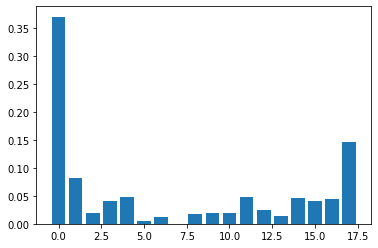

col_0,0,1
corona_test,,
0,32,6
1,3,5


In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from matplotlib import pyplot

# Train test split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=20, shuffle=True)

# Applying smote

smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)


max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)


# First create the base model to tune
rf_random = RandomForestClassifier(n_estimators = 200)


# Fit the random search model
rf_random.fit(X_train_smote,y_train_smote)


best_random = rf_random

pred = best_random.predict(X_test)

# for saving model in pickle format
from sklearn.externals import joblib
joblib.dump(best_random, "text_test.pkl")

accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset is : ", accuracy)

print(classification_report(y_test, pred))


# get importance
importance = best_random.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

pd.crosstab(y_test, pred)


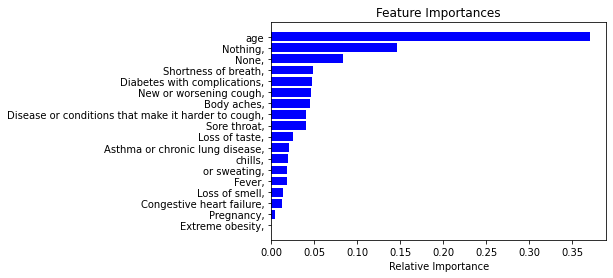

In [11]:
features = X_train_smote.columns

importances = best_random.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [20]:
count = X_train_smote

In [107]:
rf_scores = []

rf_classifier = RandomForestClassifier(n_estimators = 200)
score = cross_val_score(rf_classifier, X_train_smote, y_train_smote, cv= 5)
rf_scores.append(score.mean())
print(rf_scores)

rf_classifier.fit(X_train_smote, y_train_smote)

[0.8125]


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
pred = rf_classifier.predict(X_test)
y_test = np.array(y_test).astype("int")
print("Testing accuracy is: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

# from sklearn.externals import joblib
# joblib.dump(rf_classifier, "FYP1.pkl")

pd.crosstab(y_test, pred)

Testing accuracy is:  0.8043478260869565
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.45      0.62      0.53         8

    accuracy                           0.80        46
   macro avg       0.68      0.73      0.70        46
weighted avg       0.83      0.80      0.82        46



col_0,0,1
row_0,,
0,32,6
1,3,5


In [12]:
# from sklearn.externals import joblib
import joblib

loaded_model = joblib.load("model81.pkl")
y_pred = loaded_model.predict_proba(X_test)
print("tadaaaa the prediction is : ",y_pred)

# Testing Model with new dataframe

In [6]:
# Loading the model
# from sklearn.externals import joblib
import joblib

filename = "model81.pkl"

loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8043478260869565


/home/furqan/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/furqan/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [7]:
import text_api_new
import pandas as pd
import numpy as np

data = {
        'age': [70],
        'gender': ['male'],
        'smoker': ['no'],
        'patient_reported_symptoms': ["Fever, chills, or sweating, New or worsening cough,"],
        'medical_history': ["None,"]
        }

df1 = pd.DataFrame(data)
# df = df1.drop(columns = ["gender", "smoker"])

print(df1)

result = text_api_new.predict(df1, "model81.pkl")
print("prediction is: ",result)

k = np.argmax(result)
print(k)
if k == 1:
    print(result[0][1])
elif k == 0:
    print(0)
    
# 1 mean corona hai and 0 mean nhi hai

   age gender smoker                          patient_reported_symptoms  \
0   70   male     no  Fever, chills, or sweating, New or worsening c...   

  medical_history  
0           None,  
        age  None,  Asthma or chronic lung disease,  \
0  1.044776      1                                0   

   Disease or conditions that make it harder to cough,  \
0                                                  0     

   Diabetes with complications,  Pregnancy,  Congestive heart failure,  \
0                             0           0                          0   

   Extreme obesity,  Fever,  chills,  or sweating,  Shortness of breath  \
0                 0       1        1             1                    0   

   Loss of taste,  Loss of smell,  New or worsening cough,  Sore throat,  \
0               0               0                        1             0   

   Body aches,  Nothing,  
0            0         0  
prediction is:  [[0.315 0.685]]
1
0.685


/home/furqan/.local/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/furqan/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/furqan/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
